In [57]:
import pandas as pd
import timeit

In [58]:
df = pd.read_csv('C:/Users/Luba Tovbin/Desktop/CMPE-220/HW3/all_stocks_5yr.csv')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
date      619040 non-null object
open      619029 non-null float64
high      619032 non-null float64
low       619032 non-null float64
close     619040 non-null float64
volume    619040 non-null int64
Name      619040 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [60]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [61]:
# drop rows wher 'open' value is null
df.dropna(subset=['open'], inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619029 entries, 0 to 619039
Data columns (total 7 columns):
date      619029 non-null object
open      619029 non-null float64
high      619029 non-null float64
low       619029 non-null float64
close     619029 non-null float64
volume    619029 non-null int64
Name      619029 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 37.8+ MB


In [63]:
tickers = list(df.Name.unique())
print(type(tickers))
print(len(tickers))

<class 'list'>
505


In [64]:
names = list(df.Name)
print(type(names))
print(len(names))

<class 'list'>
619029


In [65]:
# inner loop, count number of times the ticker appears in a total list of names
def inner_loop(ticker):
    cnt = 0
    for name in names:
        if ticker==name:
            cnt +=1
    return cnt

In [66]:
# outter loop, repeat the "inner_loop" for N different tickers
def outter_loop(tickers,N):
    for ticker in tickers[:N]:
        inner_loop(ticker)
    return

In [67]:
# measure runtime for differnt values of N and record measurments in the dictionary "runtime"
# key is N, value is the runtime 
runtime = {}
# N = 1
t = timeit.timeit('outter_loop(tickers, 1)',number=1,globals=globals())
runtime.update({1:t})

In [68]:
# N = 10
t = timeit.timeit('outter_loop(tickers, 10)',number=1,globals=globals())
runtime.update({10:t})

In [73]:
# N=100-500 in steps of 100
for N in range(100,600, 100):
    t = timeit.timeit('outter_loop(tickers, N)',number=1,globals=globals())
    runtime.update({N:t})

In [74]:
runtime

{1: 0.07302269999854616,
 10: 0.43312580000019807,
 100: 3.3879752999982884,
 200: 6.688632999999754,
 300: 11.740181600000142,
 400: 14.191554099999848,
 500: 19.080005599998913}

In [75]:
import matplotlib.pyplot as plt

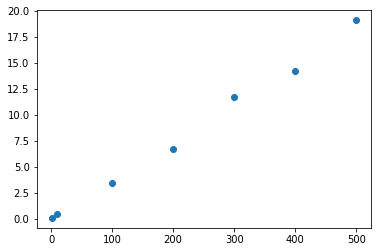

In [85]:
X = runtime.keys()
y =runtime.values()
plt.scatter(X, y)